In [1]:

import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, LSTM
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, LSTM
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import data
daily_metrics_sorted =pd.read_csv('../dataset/daily_metrics_sorted.csv', parse_dates=['date'])
price_volume_sorted = pd.read_csv('../dataset/price_volume_sorted.csv', parse_dates=['date'])
event_filtered= pd.read_csv('../dataset/event_filtered.csv', parse_dates=['date'])



In [4]:
tickers_df =pd.read_csv('../dataset/tickers.csv')
tickers = tickers_df.to_numpy()

In [5]:
tickers_df.head()

,0
0,ABIO
1,AGTC
2,AIM
3,AIRT
4,ALSK


In [6]:
#flatten the array
tickers = tickers.flatten()

In [31]:
len(tickers)

843

In [7]:
tickers

array(['ABIO', 'AGTC', 'AIM', 'AIRT', 'ALSK', 'ALT', 'BEAT', 'CASI',
       'CBAT', 'CDZI', 'CEI', 'CJJD', 'CLIR', 'CLRB', 'COHN', 'CPHC',
       'CVV', 'CYCC', 'DSS', 'ENZ', 'FDUS', 'FORD', 'GV', 'HALL', 'HBIO',
       'MFIN', 'MLR', 'MNTX', 'MPB', 'MVBF', 'NANX', 'NLTX', 'OPTT',
       'PEIX', 'PFBX', 'PRCP', 'RAIL', 'RELV', 'RMNI', 'SCYX', 'SESN',
       'SMTI', 'TCFC', 'TESS', 'TNXP', 'WHLR', 'ACER', 'AHPI', 'ASUR',
       'AVNW', 'BDGE', 'CAC', 'CWGL', 'CYTH', 'DIT', 'EML', 'FATE',
       'FZMD', 'HEPA', 'HPTO', 'JSDA', 'LEU', 'NVUS', 'OBLG', 'OCGN',
       'QTNT', 'REI', 'RKDA', 'RSLS', 'SNGX', 'SNSS', 'SPRT', 'SYN',
       'TCON', 'UEC', 'VUZI', 'WATT', 'ABMC', 'AUPH', 'BFIN', 'BKEP',
       'BYFC', 'CBLI', 'CNET', 'CRDF', 'CTG', 'EGY', 'EMYB', 'ENZN',
       'FFNW', 'FMAO', 'FTEK', 'GEC', 'HBNC', 'ICD', 'IESC', 'IGC',
       'INBK', 'LSBK', 'MCEP', 'MN', 'NVOS', 'ONTX', 'ORGS', 'PBHC',
       'REPH', 'SNCA', 'SOHO', 'SSNT', 'TNLX', 'TPCS', 'TPVG', 'UBFO',
       'WTT', 'XSPA', 

In [8]:
daily_metrics_sorted.head()

,ticker,date,lastupdated,ev,evebit,evebitda,marketcap,pb,pe,ps,sales,evsales
0,AAME,2015-03-31,2018-10-18,100.3,15.4,13.5,82.9,0.8,20.9,0.5,41.45,2.419783
1,AAME,2015-04-01,2018-10-18,99.3,15.3,13.3,81.9,0.8,20.7,0.5,40.95,2.424908
2,AAME,2015-04-02,2018-10-18,98.9,15.2,13.3,81.5,0.8,20.6,0.5,40.75,2.426994
3,AAME,2015-04-06,2018-10-18,98.9,15.2,13.3,81.5,0.8,20.6,0.5,40.75,2.426994
4,AAME,2015-04-07,2018-10-18,98.5,15.1,13.2,81.1,0.8,20.5,0.5,40.55,2.429100


In [9]:
price_volume_sorted.head()

,ticker,date,open,high,low,close,volume
0,AAME,2015-01-02,3.990,4.03,3.980,4.03,11443.0
1,AAME,2015-01-05,3.900,4.01,3.900,4.01,13727.0
2,AAME,2015-01-06,3.950,3.95,3.750,3.92,9743.0
3,AAME,2015-01-07,3.899,3.92,3.870,3.92,1486.0
4,AAME,2015-01-08,3.920,3.95,3.915,3.95,2200.0


In [10]:
event_filtered.head()

,ticker,date,11,12,13,14,21,22,23,24,...,52,53,54,55,56,57,58,71,81,91
0,ABIO,2020-12-23,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,AGTC,2020-12-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,AIM,2020-12-23,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AIRT,2020-12-23,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,ALSK,2020-12-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Cleaning up and merging Data

## CLean up event_filtered

In [12]:
# make date the index
event_filtered.set_index('date', inplace=True)


In [13]:
event_filtered.sort_values('ticker', ascending=True, inplace=True)


In [14]:
event_filtered.head()

,ticker,11,12,13,14,21,22,23,24,25,...,52,53,54,55,56,57,58,71,81,91
date,,,,,,,,,,,,,,,,,,,,,
2017-11-20,AAME,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2020-05-19,AAME,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-05-11,AAME,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-03-29,AAME,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2017-06-15,AAME,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
event_filtered.tail()

,ticker,11,12,13,14,21,22,23,24,25,...,52,53,54,55,56,57,58,71,81,91
date,,,,,,,,,,,,,,,,,,,,,
2020-05-14,ZSAN,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-08-09,ZSAN,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-05-09,ZSAN,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2018-04-03,ZSAN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-05-12,ZSAN,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Clean up price volume

In [17]:
price_volume_sorted

,ticker,date,open,high,low,close,volume
0,AAME,2015-01-02,3.990,4.030,3.980,4.030,11443.0
1,AAME,2015-01-05,3.900,4.010,3.900,4.010,13727.0
2,AAME,2015-01-06,3.950,3.950,3.750,3.920,9743.0
3,AAME,2015-01-07,3.899,3.920,3.870,3.920,1486.0
4,AAME,2015-01-08,3.920,3.950,3.915,3.950,2200.0
...,...,...,...,...,...,...,...
1266080,ZSAN,2020-12-14,0.661,0.673,0.630,0.648,3078592.0
1266081,ZSAN,2020-12-15,0.655,0.662,0.630,0.638,1594117.0
1266082,ZSAN,2020-12-16,0.633,0.645,0.598,0.607,1990734.0
1266083,ZSAN,2020-12-17,0.620,0.620,0.550,0.577,3141599.0


In [18]:
price_volume_sorted.set_index('date', inplace=True)


In [19]:
price_volume_sorted.head()

,ticker,open,high,low,close,volume
date,,,,,,
2015-01-02,AAME,3.990,4.03,3.980,4.03,11443.0
2015-01-05,AAME,3.900,4.01,3.900,4.01,13727.0
2015-01-06,AAME,3.950,3.95,3.750,3.92,9743.0
2015-01-07,AAME,3.899,3.92,3.870,3.92,1486.0
2015-01-08,AAME,3.920,3.95,3.915,3.95,2200.0


# Clean up daily metrics

In [20]:
daily_metrics_sorted = daily_metrics_sorted.drop(columns=['lastupdated'],axis = 1 )

In [21]:
daily_metrics_sorted.set_index('date', inplace=True)


In [22]:
daily_metrics_sorted.head()

,ticker,ev,evebit,evebitda,marketcap,pb,pe,ps,sales,evsales
date,,,,,,,,,,
2015-03-31,AAME,100.3,15.4,13.5,82.9,0.8,20.9,0.5,41.45,2.419783
2015-04-01,AAME,99.3,15.3,13.3,81.9,0.8,20.7,0.5,40.95,2.424908
2015-04-02,AAME,98.9,15.2,13.3,81.5,0.8,20.6,0.5,40.75,2.426994
2015-04-06,AAME,98.9,15.2,13.3,81.5,0.8,20.6,0.5,40.75,2.426994
2015-04-07,AAME,98.5,15.1,13.2,81.1,0.8,20.5,0.5,40.55,2.429100


# Time Period

In [23]:
daily_metrics_sorted.tail()

,ticker,ev,evebit,evebitda,marketcap,pb,pe,ps,sales,evsales
date,,,,,,,,,,
2020-12-14,ZSAN,39.8,-1.2,-1.2,66.1,1.2,-1.9,6.8,449.48,0.088547
2020-12-15,ZSAN,38.8,-1.2,-1.2,65.1,1.2,-1.9,6.7,436.17,0.088956
2020-12-16,ZSAN,35.7,-1.1,-1.1,62.0,1.1,-1.8,6.9,427.80,0.083450
2020-12-17,ZSAN,32.6,-1.0,-1.0,58.9,1.1,-1.7,6.9,406.41,0.080215
2020-12-18,ZSAN,33.2,-1.0,-1.0,59.5,1.1,-1.7,7.0,416.50,0.079712


In [24]:
daily_metrics_sorted_one_year = daily_metrics_sorted.loc['2020-11-18':'2020-12-18']
daily_metrics_sorted_one_year.head()

,ticker,ev,evebit,evebitda,marketcap,pb,pe,ps,sales,evsales
date,,,,,,,,,,
2020-11-18,AAME,69.1,17.8,13.6,44.3,0.3,37.2,0.2,8.86,7.799097
2020-11-19,AAME,68.7,17.7,13.6,43.9,0.3,36.8,0.2,8.78,7.824601
2020-11-20,AAME,69.9,18.0,13.8,45.1,0.4,37.8,0.2,9.02,7.749446
2020-11-23,AAME,69.1,17.8,13.6,44.3,0.3,37.2,0.2,8.86,7.799097
2020-11-24,AAME,67.5,17.4,13.3,42.7,0.3,35.8,0.2,8.54,7.903981


In [25]:
price_volume_sorted_one_year = price_volume_sorted.loc['2020-11-18':'2020-12-18']
price_volume_sorted_one_year.head()

,ticker,open,high,low,close,volume
date,,,,,,
2020-11-18,AAME,2.210,2.220,2.141,2.17,4088.0
2020-11-19,AAME,2.195,2.195,2.100,2.15,1467.0
2020-11-20,AAME,2.170,2.210,2.170,2.21,5132.0
2020-11-23,AAME,2.210,2.210,2.144,2.17,2327.0
2020-11-24,AAME,2.150,2.250,2.085,2.09,12504.0


In [26]:
event_filtered_one_year = event_filtered.loc['2020-11-18':'2020-12-18']
event_filtered_one_year.head()

,ticker,11,12,13,14,21,22,23,24,25,...,52,53,54,55,56,57,58,71,81,91
date,,,,,,,,,,,,,,,,,,,,,
2020-12-10,ABIO,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2020-11-23,ABIO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-12-15,ABIO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-12-10,ABMC,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-12-17,ACER,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


# Model Selection
As this is a time-series problem, we can use one of the following models to solve it:

- ARIMA/ARMA: Auto-Regressive Moving Average models are a class of model that captures a suite of different standard temporal structures in time series data.

- LSTM: Long-Short-Term_memory networks are a form of Recurrent Neural Networks. Few advantages of neural nets are:
Neural networks can model any non-linear function
Neural networks give good results without much parameter tuning

Aim: 
- We will try to predict the Price of the one stock based on the previous 60 values(i.e stock prices on the previous 30 days)
- We will only use the 'close' column to forecast the future stock price for simplicity. We will ignore all of the other columns.






# Data Modeling: single stock (AAME)

In [32]:
price_volume_sorted

,ticker,open,high,low,close,volume
date,,,,,,
2015-01-02,AAME,3.990,4.030,3.980,4.030,11443.0
2015-01-05,AAME,3.900,4.010,3.900,4.010,13727.0
2015-01-06,AAME,3.950,3.950,3.750,3.920,9743.0
2015-01-07,AAME,3.899,3.920,3.870,3.920,1486.0
2015-01-08,AAME,3.920,3.950,3.915,3.950,2200.0
...,...,...,...,...,...,...
2020-12-14,ZSAN,0.661,0.673,0.630,0.648,3078592.0
2020-12-15,ZSAN,0.655,0.662,0.630,0.638,1594117.0
2020-12-16,ZSAN,0.633,0.645,0.598,0.607,1990734.0


In [33]:
stock_df = price_volume_sorted[price_volume_sorted.ticker == 'AAME']




In [34]:
stock_df.head(20)

,ticker,open,high,low,close,volume
date,,,,,,
2015-01-02,AAME,3.990,4.03,3.980,4.03,11443.0
2015-01-05,AAME,3.900,4.01,3.900,4.01,13727.0
2015-01-06,AAME,3.950,3.95,3.750,3.92,9743.0
2015-01-07,AAME,3.899,3.92,3.870,3.92,1486.0
2015-01-08,AAME,3.920,3.95,3.915,3.95,2200.0
2015-01-09,AAME,3.950,4.01,3.940,4.00,3651.0
2015-01-12,AAME,4.000,4.00,4.000,4.00,1027.0
2015-01-13,AAME,3.910,4.00,3.910,4.00,1311.0
2015-01-14,AAME,3.890,4.00,3.890,4.00,220.0


<AxesSubplot:xlabel='date'>

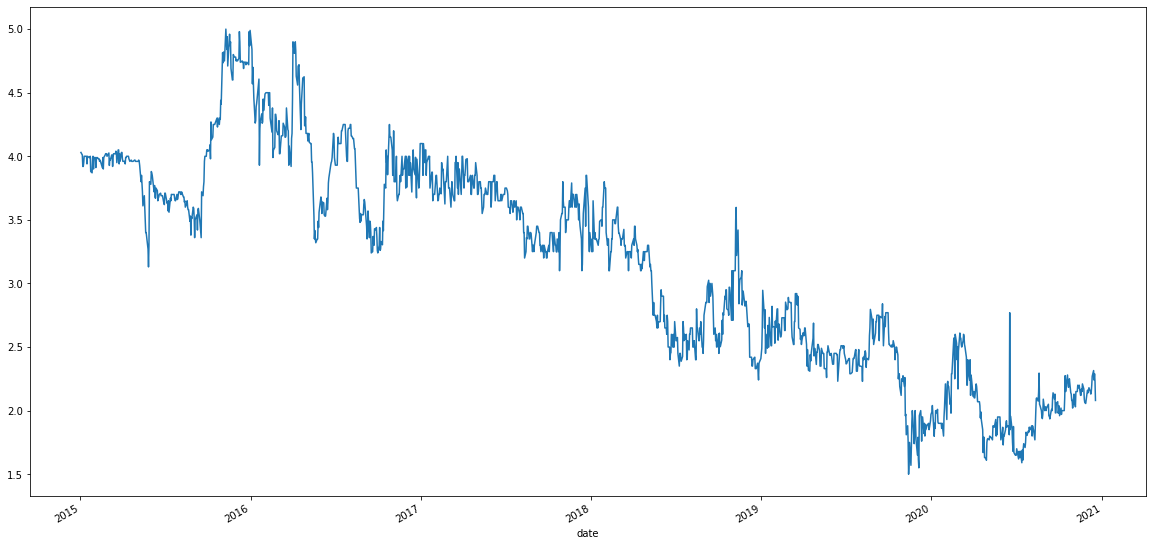

In [35]:
plt.figure(figsize=(20,10))

stock_df['close'].plot()


Our column of interest is the Close prices. We could build a regression model, where we predict the actual percentage change, or we could set this up as a binary classification problem:

- 1: The Close price was greater than or equal to the previous day
- 0: The Close price was lower than the previous day

### Data Cleaning for stock
For the stock prices, we'll need to do a few things:

- dropt the ticker name
- De-trend the dataset using .pct_change()
- Drop any NaNs that were created from step 2

###  price_volume_filtered dataframe

In [36]:
stock_df.dtypes
# check the datatypes

ticker     object
open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

In [37]:
stock_df.drop(columns = ['ticker'], inplace = True)
#drop ticker column

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
stock_df['volume'].replace(0,1, inplace=True)
#we replace rows where volume == 0 to 1 as pct_change would cause an infinite value when we use pct_change()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:4575: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [39]:
# convert the prices into percentage
stock_prices_pct = stock_df.pct_change()


In [40]:
#drop the na
stock_prices_pct.dropna(inplace=True)

<AxesSubplot:xlabel='date'>

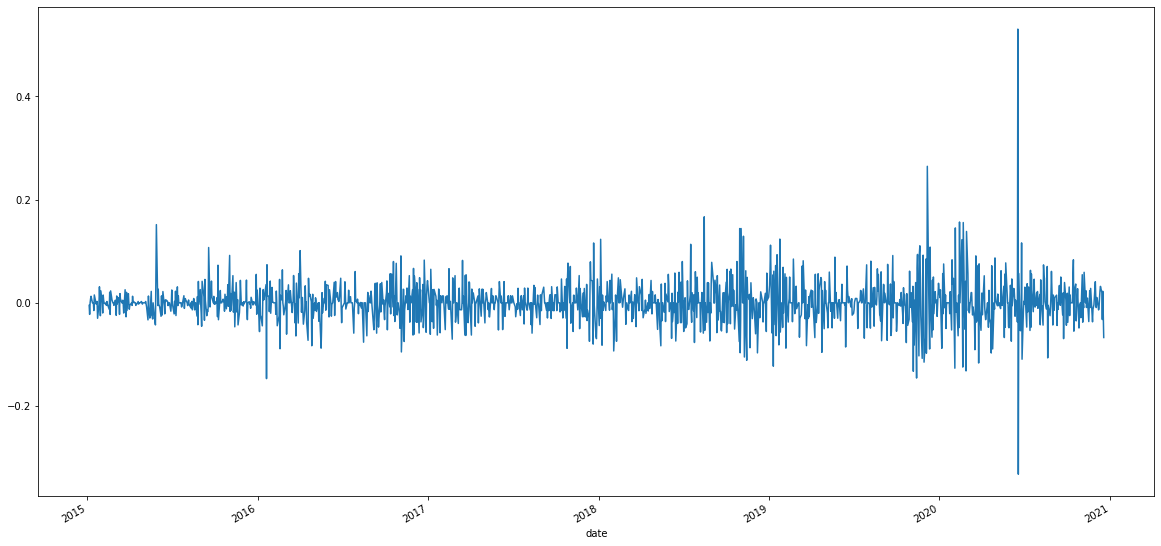

In [41]:
#plot the new detrend data
plt.figure(figsize=(20,10))
stock_prices_pct.close.plot()

### event filtered dataframe

In [43]:
# filter for stock ticker and drop ticker column
stock_event = event_filtered[event_filtered.ticker=='AAME']
stock_event.drop(columns = ['ticker'], inplace = True)
stock_event.sort_index(ascending = True, inplace=True)
stock_event.head()


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-43-86328c26dbce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_event.sort_index(ascending = True, inplace=True)


,11,12,13,14,21,22,23,24,25,26,...,52,53,54,55,56,57,58,71,81,91
date,,,,,,,,,,,,,,,,,,,,,
2015-03-27,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2015-05-12,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2015-05-15,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,1
2015-05-22,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2015-06-05,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Create Target Column

In [44]:
stock_prices_pct['Target'] = (stock_df['close'] > 0).astype(int)
stock_prices_pct.head()
#inf in dataframe means infinite value

,open,high,low,close,volume,Target
date,,,,,,
2015-01-05,-0.022556,-0.004963,-0.020101,-0.004963,0.199598,1
2015-01-06,0.012821,-0.014963,-0.038462,-0.022444,-0.290231,1
2015-01-07,-0.012911,-0.007595,0.032000,0.000000,-0.847480,1
2015-01-08,0.005386,0.007653,0.011628,0.007653,0.480485,1
2015-01-09,0.007653,0.015190,0.006386,0.012658,0.659545,1


### Merge the columns

In [45]:
df = pd.merge(stock_prices_pct,stock_event , left_index=True, right_index=True, how='left')


In [46]:
print(df.isnull().sum())


open         0
high         0
low          0
close        0
volume       0
Target       0
11        1461
12        1461
13        1461
14        1461
21        1461
22        1461
23        1461
24        1461
25        1461
26        1461
31        1461
32        1461
33        1461
34        1461
35        1461
37        1461
41        1461
42        1461
51        1461
52        1461
53        1461
54        1461
55        1461
56        1461
57        1461
58        1461
71        1461
81        1461
91        1461
dtype: int64


In [47]:
df['11'].sum()

0.0

In [48]:
df.fillna(0,inplace = True)
#check for the null values and fill it with fillna

In [49]:
print(df.isnull().sum())


open      0
high      0
low       0
close     0
volume    0
Target    0
11        0
12        0
13        0
14        0
21        0
22        0
23        0
24        0
25        0
26        0
31        0
32        0
33        0
34        0
35        0
37        0
41        0
42        0
51        0
52        0
53        0
54        0
55        0
56        0
57        0
58        0
71        0
81        0
91        0
dtype: int64


# Train/Test Split

In [50]:
features = [col for col in df.columns if not col == 'Target']
X = df[features]
y = df[['Target']].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
X_train.head()

,open,high,low,close,volume,11,12,13,14,21,...,52,53,54,55,56,57,58,71,81,91
date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.022556,-0.004963,-0.020101,-0.004963,0.199598,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-06,0.012821,-0.014963,-0.038462,-0.022444,-0.290231,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-07,-0.012911,-0.007595,0.032000,0.000000,-0.847480,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-08,0.005386,0.007653,0.011628,0.007653,0.480485,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-09,0.007653,0.015190,0.006386,0.012658,0.659545,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
X_train.shape

(1126, 34)

In [53]:
X_test.shape

(376, 34)

# Feature Scaling

In [54]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

# TimeseriesGenerator
- We'll now convert our data into series' using TimeseriesGenerator. The length parameter dictates how many rows will constitute a sample. The generator also creates our batches.

In [55]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=3, batch_size=64)


In [56]:
batch_x, batch_y = train_sequences[0]


In [57]:
batch_x.shape


(64, 3, 34)

In [58]:
batch_y.shape


(64, 1)

In [59]:
batch_x[0]


array([[-0.57991153, -0.15467685, -0.49844013, -0.15105143, -0.09765919,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.12745779,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.02981424,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.02981424,  0.        ,  0.        , -0.07909226,
        -0.04218245,  0.        ,  0.        ,  0.        , -0.0667855 ,
         0.        , -0.02981424, -0.05168574, -0.14757569],
       [ 0.31516635, -0.45965893, -0.94407714, -0.66839592, -0.09882625,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.12745779,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.02981424,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.02981424,  0.        ,  0.        , -0.07909226,
        -0.04218245,  0.        ,  0.        ,  0.        , -0.0667855 ,
         0.        , -0.02981424, -0.05168574, -0.14757569],
  

In [60]:
pd.DataFrame(X_train_sc, columns=X_train.columns).head(3)


,open,high,low,close,volume,11,12,13,14,21,...,52,53,54,55,56,57,58,71,81,91
0,-0.579912,-0.154677,-0.498440,-0.151051,-0.097659,0.0,0.0,0.0,0.0,0.0,...,-0.079092,-0.042182,0.0,0.0,0.0,-0.066786,0.0,-0.029814,-0.051686,-0.147576
1,0.315166,-0.459659,-0.944077,-0.668396,-0.098826,0.0,0.0,0.0,0.0,0.0,...,-0.079092,-0.042182,0.0,0.0,0.0,-0.066786,0.0,-0.029814,-0.051686,-0.147576
2,-0.335882,-0.234954,0.766081,-0.004181,-0.100154,0.0,0.0,0.0,0.0,0.0,...,-0.079092,-0.042182,0.0,0.0,0.0,-0.066786,0.0,-0.029814,-0.051686,-0.147576


In [61]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size=64)


In [62]:
len(features)

34

# Modelling

## GRU

In [63]:
model = Sequential()
model.add(GRU(34, input_shape=(3, 34), return_sequences=True)) #34 features (Open, High, ... 8-K)  and 3 rows for one sample 
model.add(GRU(34))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile(optimizer=Adam(lr=.0005), loss='binary_crossentropy', metrics=['acc'])

history = model.fit_generator(train_sequences, validation_data=test_sequences, epochs=20, verbose=0)
# fit is used when the entire training dataset can fit into the memory and no data augmentation is applied. . fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


In [65]:
# history = model.fit(X_train_sc,
#                         y_train,
#                         validation_data=(X_test_sc, y_test),
#                         epochs=5,
#                         verbose=1)

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 3, 34)             7140      
_________________________________________________________________
gru_1 (GRU)                  (None, 34)                7140      
_________________________________________________________________
dense (Dense)                (None, 4)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 14,425
Trainable params: 14,425
Non-trainable params: 0
_________________________________________________________________


In [67]:
# y_pred=history.predict(X_test_sc)
# # y_test=scaler.inverse_transform(y_test)
# # y_pred=scaler.inverse_transform(y_pred)

In [68]:
# _, train_acc = model.evaluate(X_train_sc, y_train, verbose=0)
# _, test_acc = model.evaluate(X_test_sc, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

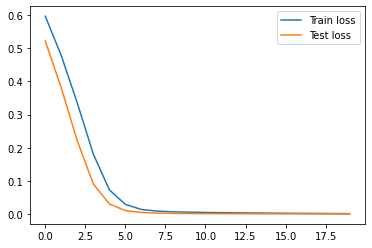

In [69]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();


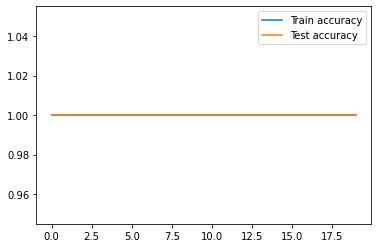

In [70]:

plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();

## LSTM

In [71]:
model = Sequential()
model.add(LSTM(34, input_shape=(3, 34), return_sequences=True)) #34 features (Open, High, ... 8-K)  and 3 rows for one sample 
model.add(LSTM(34))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [72]:
model.compile(optimizer=Adam(lr=.0005), loss='binary_crossentropy', metrics=['acc'])

history = model.fit_generator(train_sequences, validation_data=test_sequences, epochs=20, verbose=0)

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 34)             9384      
_________________________________________________________________
lstm_1 (LSTM)                (None, 34)                9384      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 140       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 18,913
Trainable params: 18,913
Non-trainable params: 0
_________________________________________________________________


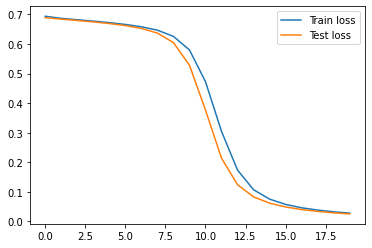

In [74]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();


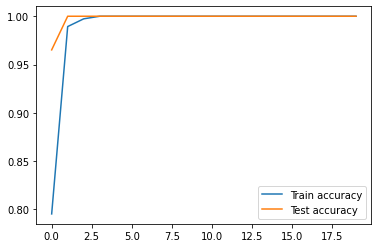

In [75]:

plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();

In [76]:
# test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=3, batch_size=64)


In [77]:
X_test_sc

array([[-0.21081106, -0.24633629, -0.01058489, ..., -0.02981424,
        -0.05168574, -0.14757569],
       [-0.00920793,  0.48662198, -0.01058489, ..., -0.02981424,
        -0.05168574, -0.14757569],
       [-0.4156528 , -0.48551222, -0.40047723, ..., -0.02981424,
        -0.05168574, -0.14757569],
       ...,
       [-0.78942093, -0.00331817, -0.13133513, ..., -0.02981424,
        -0.05168574, -0.14757569],
       [ 0.56581919, -0.00331817, -0.34155032, ..., -0.02981424,
        -0.05168574, -0.14757569],
       [-0.68390641, -1.44317446, -1.12905486, ..., -0.02981424,
        -0.05168574, -0.14757569]])

In [78]:
y_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [79]:
why is y_test all 1?

SyntaxError: invalid syntax (<ipython-input-79-a47514229c6d>, line 1)

In [ ]:
# y_pred=model.predict(X_test_sc)
# y_test=scaler.inverse_transform(y_test)
# y_pred=scaler.inverse_transform(y_pred)

# Merge all Data

In [ ]:
stop

In [ ]:

merged_df = price_volume_sorted_one_year.merge(daily_metrics_sorted_one_year, how="left", left_index=True,right_on='ticker')


In [ ]:
_, train_acc = model.evaluate(X_train_sc, y_train, verbose=0)
_, test_acc = model.evaluate(X_test_sc, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
# merged_df = price_volume_sorted_one_year.merge(daily_metrics_sorted_one_year, how="left", left_index=True, right_index=True)


In [ ]:
merged_df

In [ ]:
merged_df = merged_df(event_filtered_one_year, how="left", left_index=True, right_index=True)

In [ ]:
merged_df

In [ ]:
stop

In [ ]:
r = a.join(b, on='date')

In [ ]:
d.join(f)

In [ ]:
find something less time consuming than concat

In [ ]:
df = pd.concat([a,b], axis = 1)

In [ ]:
df = pd.concat([d,f], axis = 1)

In [ ]:
df

In [ ]:
df = pd.concat([df,e], axis = 1)

In [ ]:
df

In [ ]:
#save df as a csv because it takes too long to run
df.to_csv('../dataset/modelling_dataset.csv')

In [ ]:
stop

In [ ]:
df = pd.merge(price_volume_sorted,daily_metrics_sorted, left_index=True, right_index=True, how='left')

In [ ]:
df = pd.merge(df,event_filtered, left_index=True, right_index=True, how='left')

In [ ]:
df.head()

In [ ]:
stop

# LSTM: Multiple stock ticker prices at a time
Before we build the LSTM model we need to prepare our data for the LSTM. The data need to be scaled and reshaped.

In [ ]:
#
def Scale(train, test):
  scaler = MinMaxScaler()
  train = np.array(train)
  test = np.array(test)
  train = scaler.fit_transform(train.reshape(train.shape[0], -1))
  test = scaler.transform(test.reshape(test.shape[0], -1))
  return scaler, train, test

In [ ]:
def PrepareData(sequence, n_steps):
  x, y = [],[]
  length = sequence.shape[0]
  for i in range(length):
    end_index = i + n_steps
    
    if(end_index >= length):
      break;
     
    x.append(sequence[i:end_index]) 
    y.append(sequence[end_index])
    
  x = np.array(x)
  y = np.array(y)
  x = x.reshape(x.shape[0], n_steps, 1)
  return x, y

In [ ]:
def CreateModel(rate = 0.4, n_features = 501):
  model = Sequential()
  model.add(GRU(256, return_sequences=True, input_shape = (2, n_features)))
  model.add(Dropout(rate))
  model.add(LSTM(256))
  model.add(Dropout(rate))
  model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(n_features)) # Number of outputs
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
  return model

In [ ]:
def split_sequences(sequences, n_steps):
  x, y = list(), list()
  for i in range(len(sequences)):
    end_ix = i + n_steps
    
    if(end_ix > len(sequences)-1):
      break
      
    seq_x, seq_y = sequences[i: end_ix, :], sequences[end_ix, :]
    
    x.append(seq_x)
    y.append(seq_y)
    
  x = np.array(x)
  y = np.array(y)
  
  return x, y

In [ ]:
# 1792 is the maximum number of observations for most of the stocks
# In order to predict the stock prices using multiple series
# together in an LSTM, we need to Zeropad the unknown values
MAX_VALUES_TRAIN = 1409 # 1792 * 0.8
MAX_VALUES_TEST = 353 # 1792 - 1409
def ZeroPadding(sequence, maxPaddingWidth):
    length = len(sequence)
    if(length < maxPaddingWidth):
        retVal = np.pad(sequence.flatten(), (0, maxPaddingWidth-length), 'constant', constant_values=[0])
        return retVal
    return sequence

#   sequence = [1,2,3,4]
#   return sequence = [1,2,3,4,0,0,0,.... upto 1791 index]
  
#   sequence = [1,2,3,4, 5, 6, 7 .... 1791]
#   return sequence = [1,2,3,4, 5, 6, 7..... 1791] -> No padding as the length match
  